# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [49]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [133]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

     # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | west island
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | enewetak
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | broome
Processing Record 8 of Set 1 | yeppoon city centre
City not found. Skipping...
Processing Record 9 of Set 1 | san agustin de valle fertil
Processing Record 10 of Set 1 | gaalkacyo
Processing Record 11 of Set 1 | hirna
Processing Record 12 of Set 1 | keflavik
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | aasiaat
Processing Record 15 of Set 1 | altay
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | shingu
Processing Record 20 of Set 1 | alotau
City not found. Skipping...
Processing Record 21 of Set 1 | sinabang
Processi

In [134]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [135]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,6.93,98,100,0.26,CL,1682308820
1,west island,-12.1568,96.8225,28.99,79,40,6.17,CC,1682308820
2,bethel,41.3712,-73.4140,9.72,86,13,2.04,US,1682308820
3,grytviken,-54.2811,-36.5092,1.36,81,70,9.24,GS,1682308820
4,enewetak,11.3474,162.3373,26.85,84,99,8.24,MH,1682308820


In [136]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [137]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,6.93,98,100,0.26,CL,1682308820
1,west island,-12.1568,96.8225,28.99,79,40,6.17,CC,1682308820
2,bethel,41.3712,-73.4140,9.72,86,13,2.04,US,1682308820
3,grytviken,-54.2811,-36.5092,1.36,81,70,9.24,GS,1682308820
4,enewetak,11.3474,162.3373,26.85,84,99,8.24,MH,1682308820


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

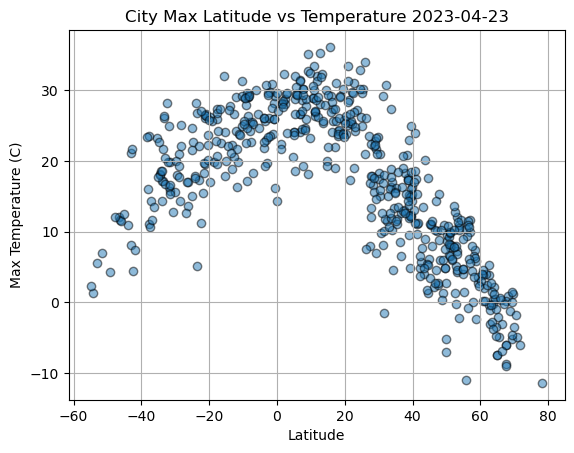

In [138]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, marker='o', alpha=0.5, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs Temperature 2023-04-23')


# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

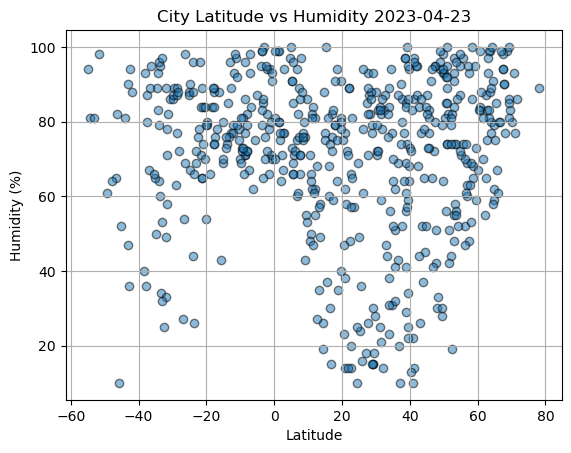

In [139]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, marker='o', alpha=0.5, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity 2023-04-23')

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

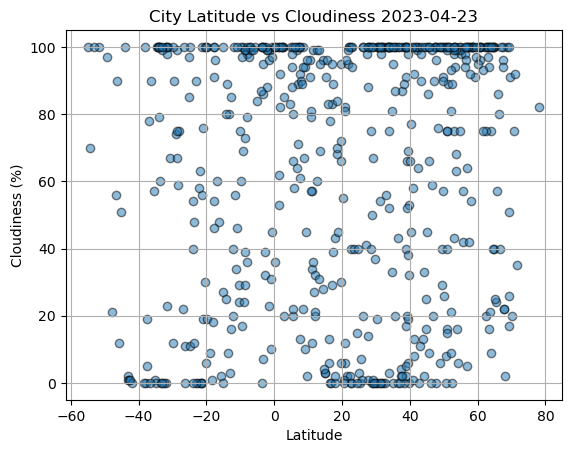

In [140]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, marker='o', alpha=0.5, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness 2023-04-23')

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

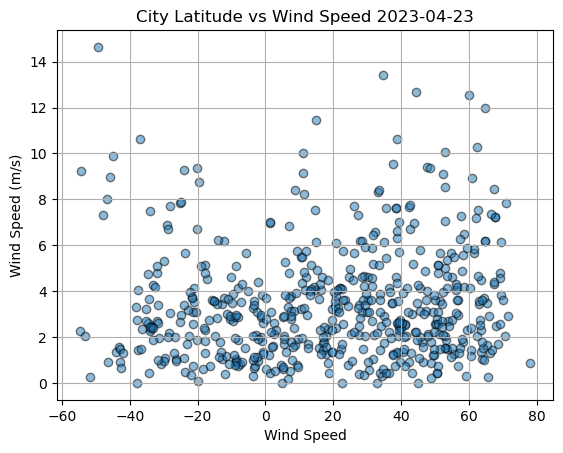

In [141]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, marker='o', alpha=0.5, edgecolors='black')
plt.xlabel('Wind Speed')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs Wind Speed 2023-04-23')

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [142]:
# Define a function to create Linear Regression plots
def linear_regression_plot (x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    # Get regression values
    regress_values = x_values * slope + intercept
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    # Create plot
    plt.scatter(x_values,y_values, color = 'steelblue')
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,xy = (min(x_values), min(y_values)), xycoords='data',fontsize=12,color="red")
    # Print r value
    print(line_eq)
    print(f"The r-value is: {rvalue**2}")
  


    

In [143]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bethel,41.3712,-73.4140,9.72,86,13,2.04,US,1682308820
4,enewetak,11.3474,162.3373,26.85,84,99,8.24,MH,1682308820
6,broome,42.2506,-75.8330,4.92,95,99,0.89,US,1682308820
8,gaalkacyo,6.7697,47.4308,26.64,75,64,3.31,SO,1682308821
9,hirna,9.2167,41.1000,18.17,76,94,0.80,ET,1682308821


In [144]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,6.93,98,100,0.26,CL,1682308820
1,west island,-12.1568,96.8225,28.99,79,40,6.17,CC,1682308820
3,grytviken,-54.2811,-36.5092,1.36,81,70,9.24,GS,1682308820
5,avarua,-21.2078,-159.7750,26.03,65,56,3.09,CK,1682308820
7,san agustin de valle fertil,-30.6335,-67.4682,12.82,86,67,0.82,AR,1682308821


###  Temperature vs. Latitude Linear Regression Plot

y = -0.51x +32.94
The r-value is: 0.7931131036164489


Text(0, 0.5, 'Max Temp')

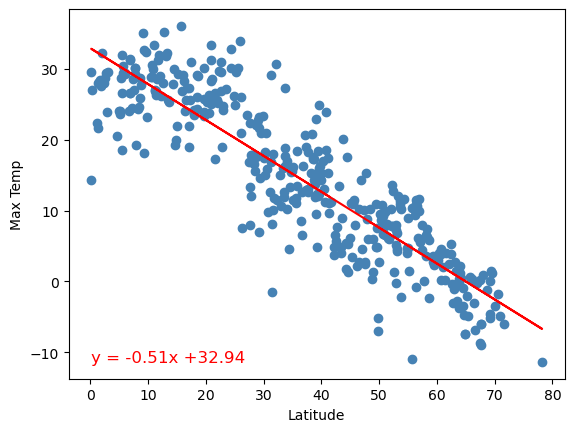

In [145]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Perform a linear regression on temperature vs. latitude
linear_regression_plot (x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

y = 0.33x +28.09
The r-value is: 0.5080802159265417


Text(0, 0.5, 'Max Temp')

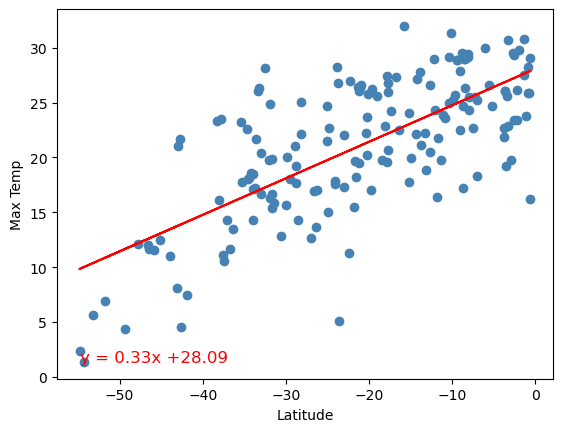

In [146]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Perform a linear regression on temperature vs. latitude
linear_regression_plot (x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

**Discussion about the linear relationship:** 
In Northern Hemisphere, there is a strong negative relationship between latitude and max temperature as the correlation coefficient is approximately equal 79,3%. If the lattitude increases by one unit, the temperature will decrease by 0.51 Celcius. By contrast, a strong positive relationship occurs whislt lattiude increases by one unit, the temperature wil increase by 0.33 celcius. 

### Humidity vs. Latitude Linear Regression Plot

y = 0.19x +62.56
The r-value is: 0.02509308522899445


Text(0, 0.5, 'Humidity')

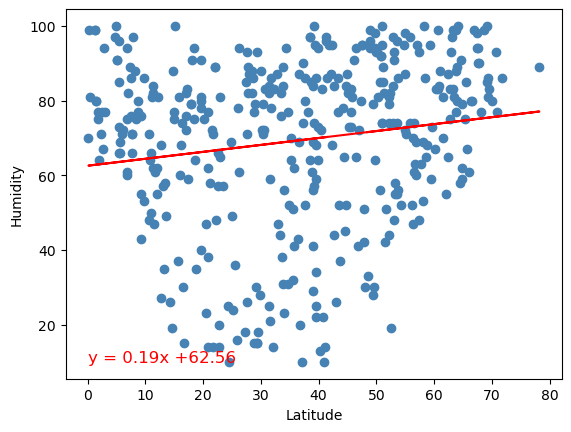

In [147]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Perform a linear regression on temperature vs. latitude
linear_regression_plot (x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')

y = 0.3x +82.32
The r-value is: 0.05862219584745323


Text(0, 0.5, 'Humidity')

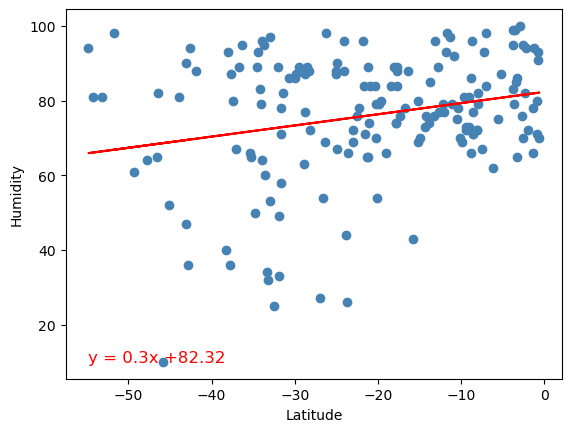

In [148]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Perform a linear regression on temperature vs. latitude
linear_regression_plot (x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')

**Discussion about the linear relationship:** 
In both northern hemisphere and southern hemisphere, the correlation coefficient are very close to 0 (0.02 and 0.058 respectively) which indicate no meaningful relationship between latitude and humidity. Furthermore, it can be seen that 90% of the data points in both grapths are outliers and they are scattering far away from the regression line. 

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.17x +57.84
The r-value is: 0.007573198458578702


Text(0, 0.5, 'Cloudiness')

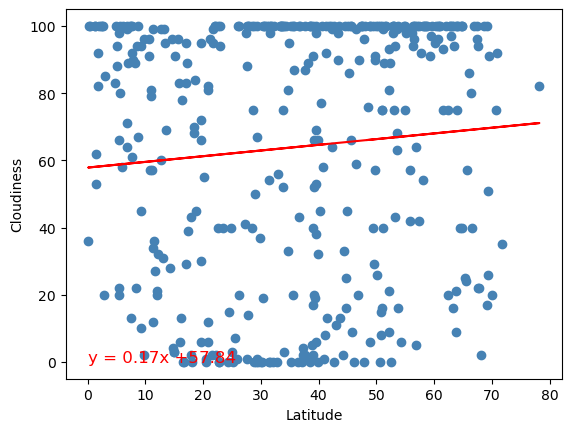

In [149]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Perform a linear regression on temperature vs. latitude
linear_regression_plot (x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

y = 0.38x +66.89
The r-value is: 0.017883714947616515


Text(0, 0.5, 'Cloudiness')

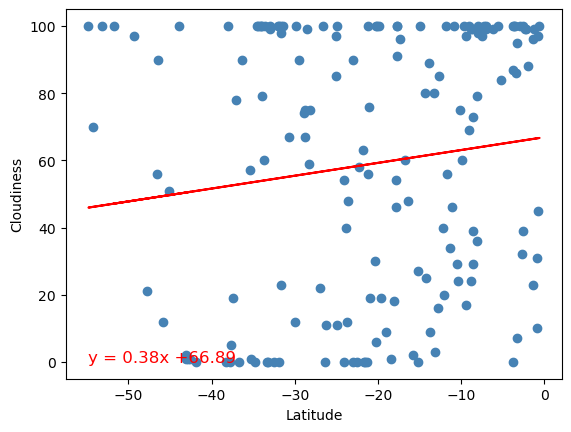

In [150]:
# Southern Hemisphere
# Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Perform a linear regression on temperature vs. latitude
linear_regression_plot (x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

**Discussion about the linear relationship:** 
In both northern hemisphere and southern hemisphere, the correlation coefficient are very close to 0 (0.07 and 0.017 respectively) which indicate no meaningful relationship between latitude and cloudiness. Moreover, it can be seen that the data points in both grapths are spreading out even more. This means there is no trend to the data; thus, there is no correlation.

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.01x +3.05
The r-value is: 0.011573753907871612


Text(0, 0.5, 'Wind Speed')

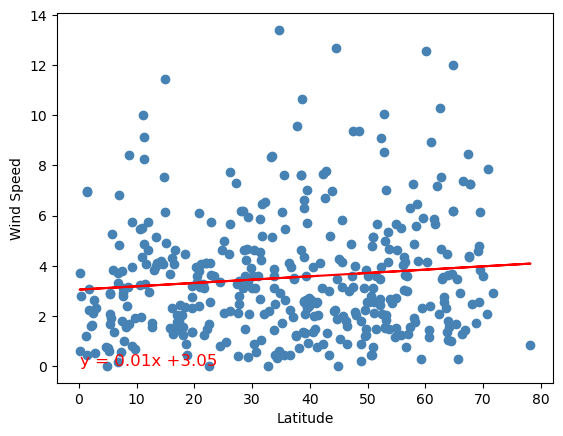

In [151]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Perform a linear regression on temperature vs. latitude
linear_regression_plot (x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

y = -0.04x +2.2
The r-value is: 0.05779683680072519


Text(0, 0.5, 'Wind Speed')

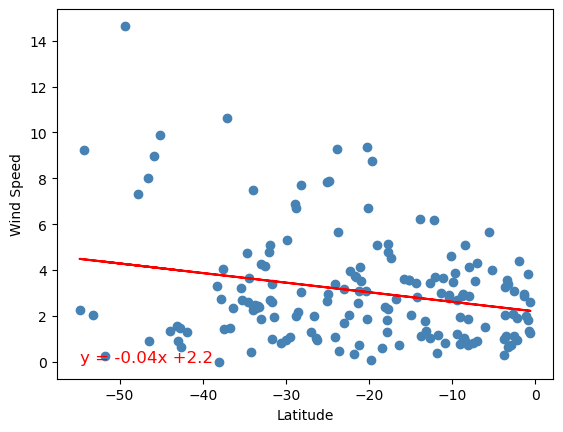

In [152]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Perform a linear regression on temperature vs. latitude
linear_regression_plot (x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

**Discussion about the linear relationship:** 
In both northern hemisphere and southern hemisphere, the correlation coefficient are very close to 0 (0.011 and 0.05 respectively) which indicate no meaningful relationship between latitude and wind speed. Moreover, it can be seen that most the data points in both grapths are not clustering around the regression line. 